# Twitter Sentiment Analysis Classification - Exploratory Data Analysis

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import STOPWORDS

from preprocessing import *
import html

## Dataset Load

!curl "https://dbdmg.polito.it/dbdmg_web/wp-content/uploads/2021/12/DSL2122_january_dataset.zip" -Lo dataset.zip

!unzip -q dataset.zip; rm dataset.zip; rm -r __MACOSX/

In [2]:
tweets = load_dataset()

## Data exploration

In [3]:
for col in tweets.columns:
    print(f' {col} has {len(tweets[col].unique())} unique values.')

 sentiment has 2 unique values.
 ids has 224716 unique values.
 date has 189779 unique values.
 flag has 1 unique values.
 user has 10647 unique values.
 text has 223106 unique values.


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224994 entries, 0 to 224993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  224994 non-null  int64 
 1   ids        224994 non-null  int64 
 2   date       224994 non-null  object
 3   flag       224994 non-null  object
 4   user       224994 non-null  object
 5   text       224994 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.3+ MB


In [5]:
tweets.describe()

,sentiment,ids
count,224994.000000,2.249940e+05
mean,0.578491,1.988334e+09
std,0.493802,1.777980e+08
min,0.000000,1.467811e+09
25%,0.000000,1.956965e+09
50%,1.000000,1.996993e+09
75%,1.000000,2.064995e+09
max,1.000000,2.329205e+09


## Graphics

In [6]:
sns.set_theme(style='darkgrid')

In [7]:
tweets = load_dataset()
tweets.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,sentiment,ids
sentiment,1.0,-0.24
ids,-0.24,1.0


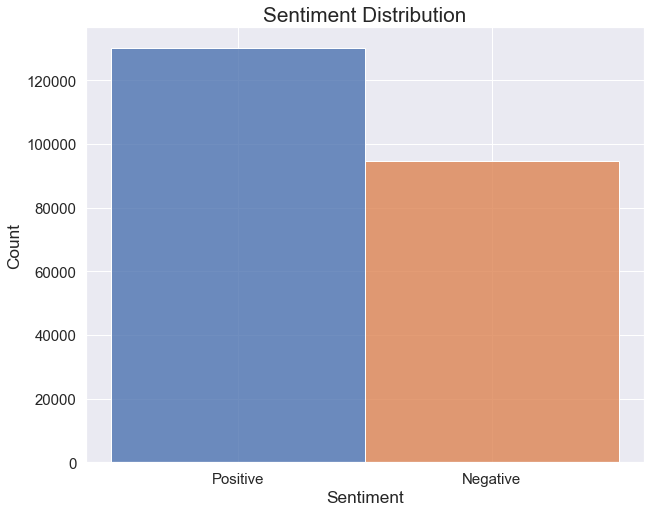

In [24]:
tweets = load_dataset()
fig, ax = plt.subplots(figsize=(10, 8))

d = {0: "Negative", 1:"Positive"}
sns.histplot(x=tweets["sentiment"].apply(lambda x: d[x]), ax=ax, hue=tweets["sentiment"], legend=None, hue_order=[1, 0], alpha=0.8)

plt.title("Sentiment Distribution", fontdict={"fontsize": "xx-large"})

plt.xlabel("Sentiment", fontdict={"fontsize": "x-large"})
plt.ylabel("Count", fontdict={"fontsize": "x-large"})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig("./report/figures/unbalanced.svg", format='svg')

plt.show()

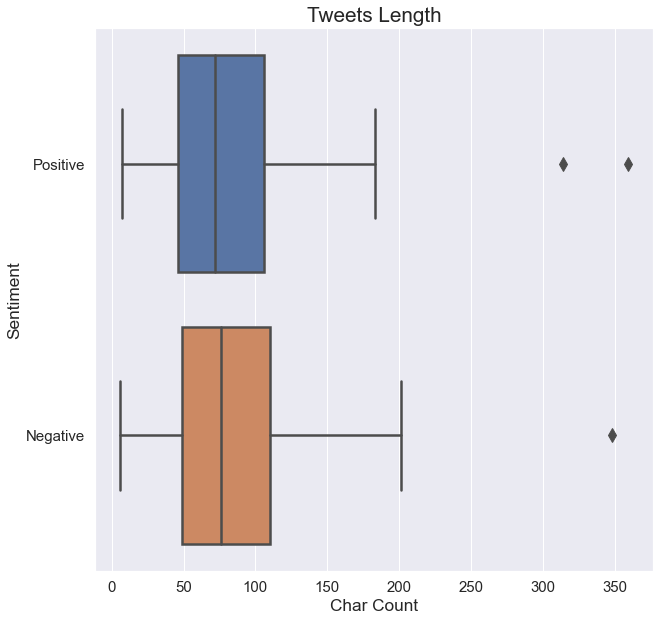

In [26]:
tweets = load_dataset()
tweets["text"] = tweets["text"].apply(lambda x : html.unescape(x))
tweets['char_count'] = list(map(lambda x: len(x), tweets['text'])) 


fig, ax = plt.subplots(figsize=(10, 10))
d = {0: "Negative", 1:"Positive"}

sns.boxplot(data=tweets, x = "char_count", y = tweets["sentiment"].apply(lambda x: d[x]), orient='h', ax= ax, linewidth=2.5, fliersize=10)


plt.title("Tweets Length", fontdict={"fontsize": "xx-large"})

plt.xlabel("Char Count", fontdict={"fontsize": "x-large"})
plt.ylabel("Sentiment", fontdict={"fontsize": "x-large"})

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig("./report/figures/lenghts_distrib.svg", format='svg')

plt.show()

/Users/gio/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


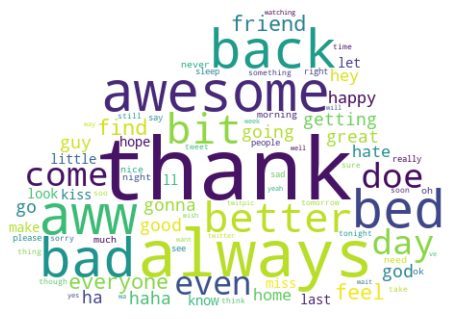

In [2]:
tweets = load_dataset().pipe(drop_duplicates).pipe(clean_text)
fig, ax = plt.subplots(figsize=(8,8))
cloud_mask = np.array(Image.open("./report/figures/cloud.png"))
wc = WordCloud(background_color=None, mode="RGBA", mask=cloud_mask, prefer_horizontal=True, random_state=42)

vectorizer = TfidfVectorizer(strip_accents="ascii", stop_words = STOPWORDS, use_idf=False, min_df=0.01)
wc = WordCloud(background_color="white", mask=cloud_mask, prefer_horizontal=True, random_state=666)
vectorizer.fit(tweets["text"])
wc.generate_from_text(" ".join(vectorizer.get_feature_names()))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
fig.savefig("./report/figures/word_cloud.png", format='png', transparent=True, dpi=700)

plt.show()